# Import

In [72]:
import lab
import lab.plot
import lab.data
import lab.mmath as mmath
import lab.utils as utils
import lab.arr as arr
import lab.linfit as lf
import lab.constants as const
import math
import lab.utils as utils
from lab.unit import unit as u
from uncertainties import ufloat
import matplotlib.pyplot as plt
print("Import done!")

Import done!


# Read data

In [73]:
data7 = lab.data.Data("../data/task7.csv")
data7.head(5)

,x,R
0,24.20+/-0.05 centimeter,10.0 kiloohm
1,16.50+/-0.05 centimeter,15.0 kiloohm
2,12.60+/-0.05 centimeter,20.0 kiloohm
3,10.20+/-0.05 centimeter,25.0 kiloohm
4,8.60+/-0.05 centimeter,30.0 kiloohm


In [74]:
R1R2_7 = 1/2000
U0 = ufloat(66.3, 0.5) * u("V")
R0 = 475 * u("ohm")
L = ufloat(140, 1) * u("cm")

In [75]:
data7["I"] =  1/(data7["R"] + R0) * R1R2_7*U0
data7["I"] = data7["I"].ito(u("microampere"))
data7

,x,R,I
0,24.20+/-0.05 centimeter,10.0 kiloohm,3.165+/-0.024 microampere
1,16.50+/-0.05 centimeter,15.0 kiloohm,2.142+/-0.016 microampere
2,12.60+/-0.05 centimeter,20.0 kiloohm,1.619+/-0.012 microampere
3,10.20+/-0.05 centimeter,25.0 kiloohm,1.301+/-0.010 microampere
4,8.60+/-0.05 centimeter,30.0 kiloohm,1.088+/-0.008 microampere
5,7.40+/-0.05 centimeter,35.0 kiloohm,0.934+/-0.007 microampere
6,6.60+/-0.05 centimeter,40.0 kiloohm,0.819+/-0.006 microampere
7,5.90+/-0.05 centimeter,45.0 kiloohm,0.729+/-0.005 microampere
8,5.40+/-0.05 centimeter,50.0 kiloohm,0.657+/-0.005 microampere
9,4.90+/-0.05 centimeter,55.0 kiloohm,0.598+/-0.005 microampere


In [107]:
utils.totex(data7, file="../tex/data7.tex")

In [109]:
x7 = data7["x"]
y7 = data7["I"]
k7, b7 = lf.chi2(x7, y7)
k7
utils.totex(k7)

\left(1329 \pm 5\right)\cdot 10^{-4}\;\text{мкА} / \text{см}


In [110]:
k7

0.13288892724409637+/-0.0004942167259294846 <Unit('microampere / centimeter')>

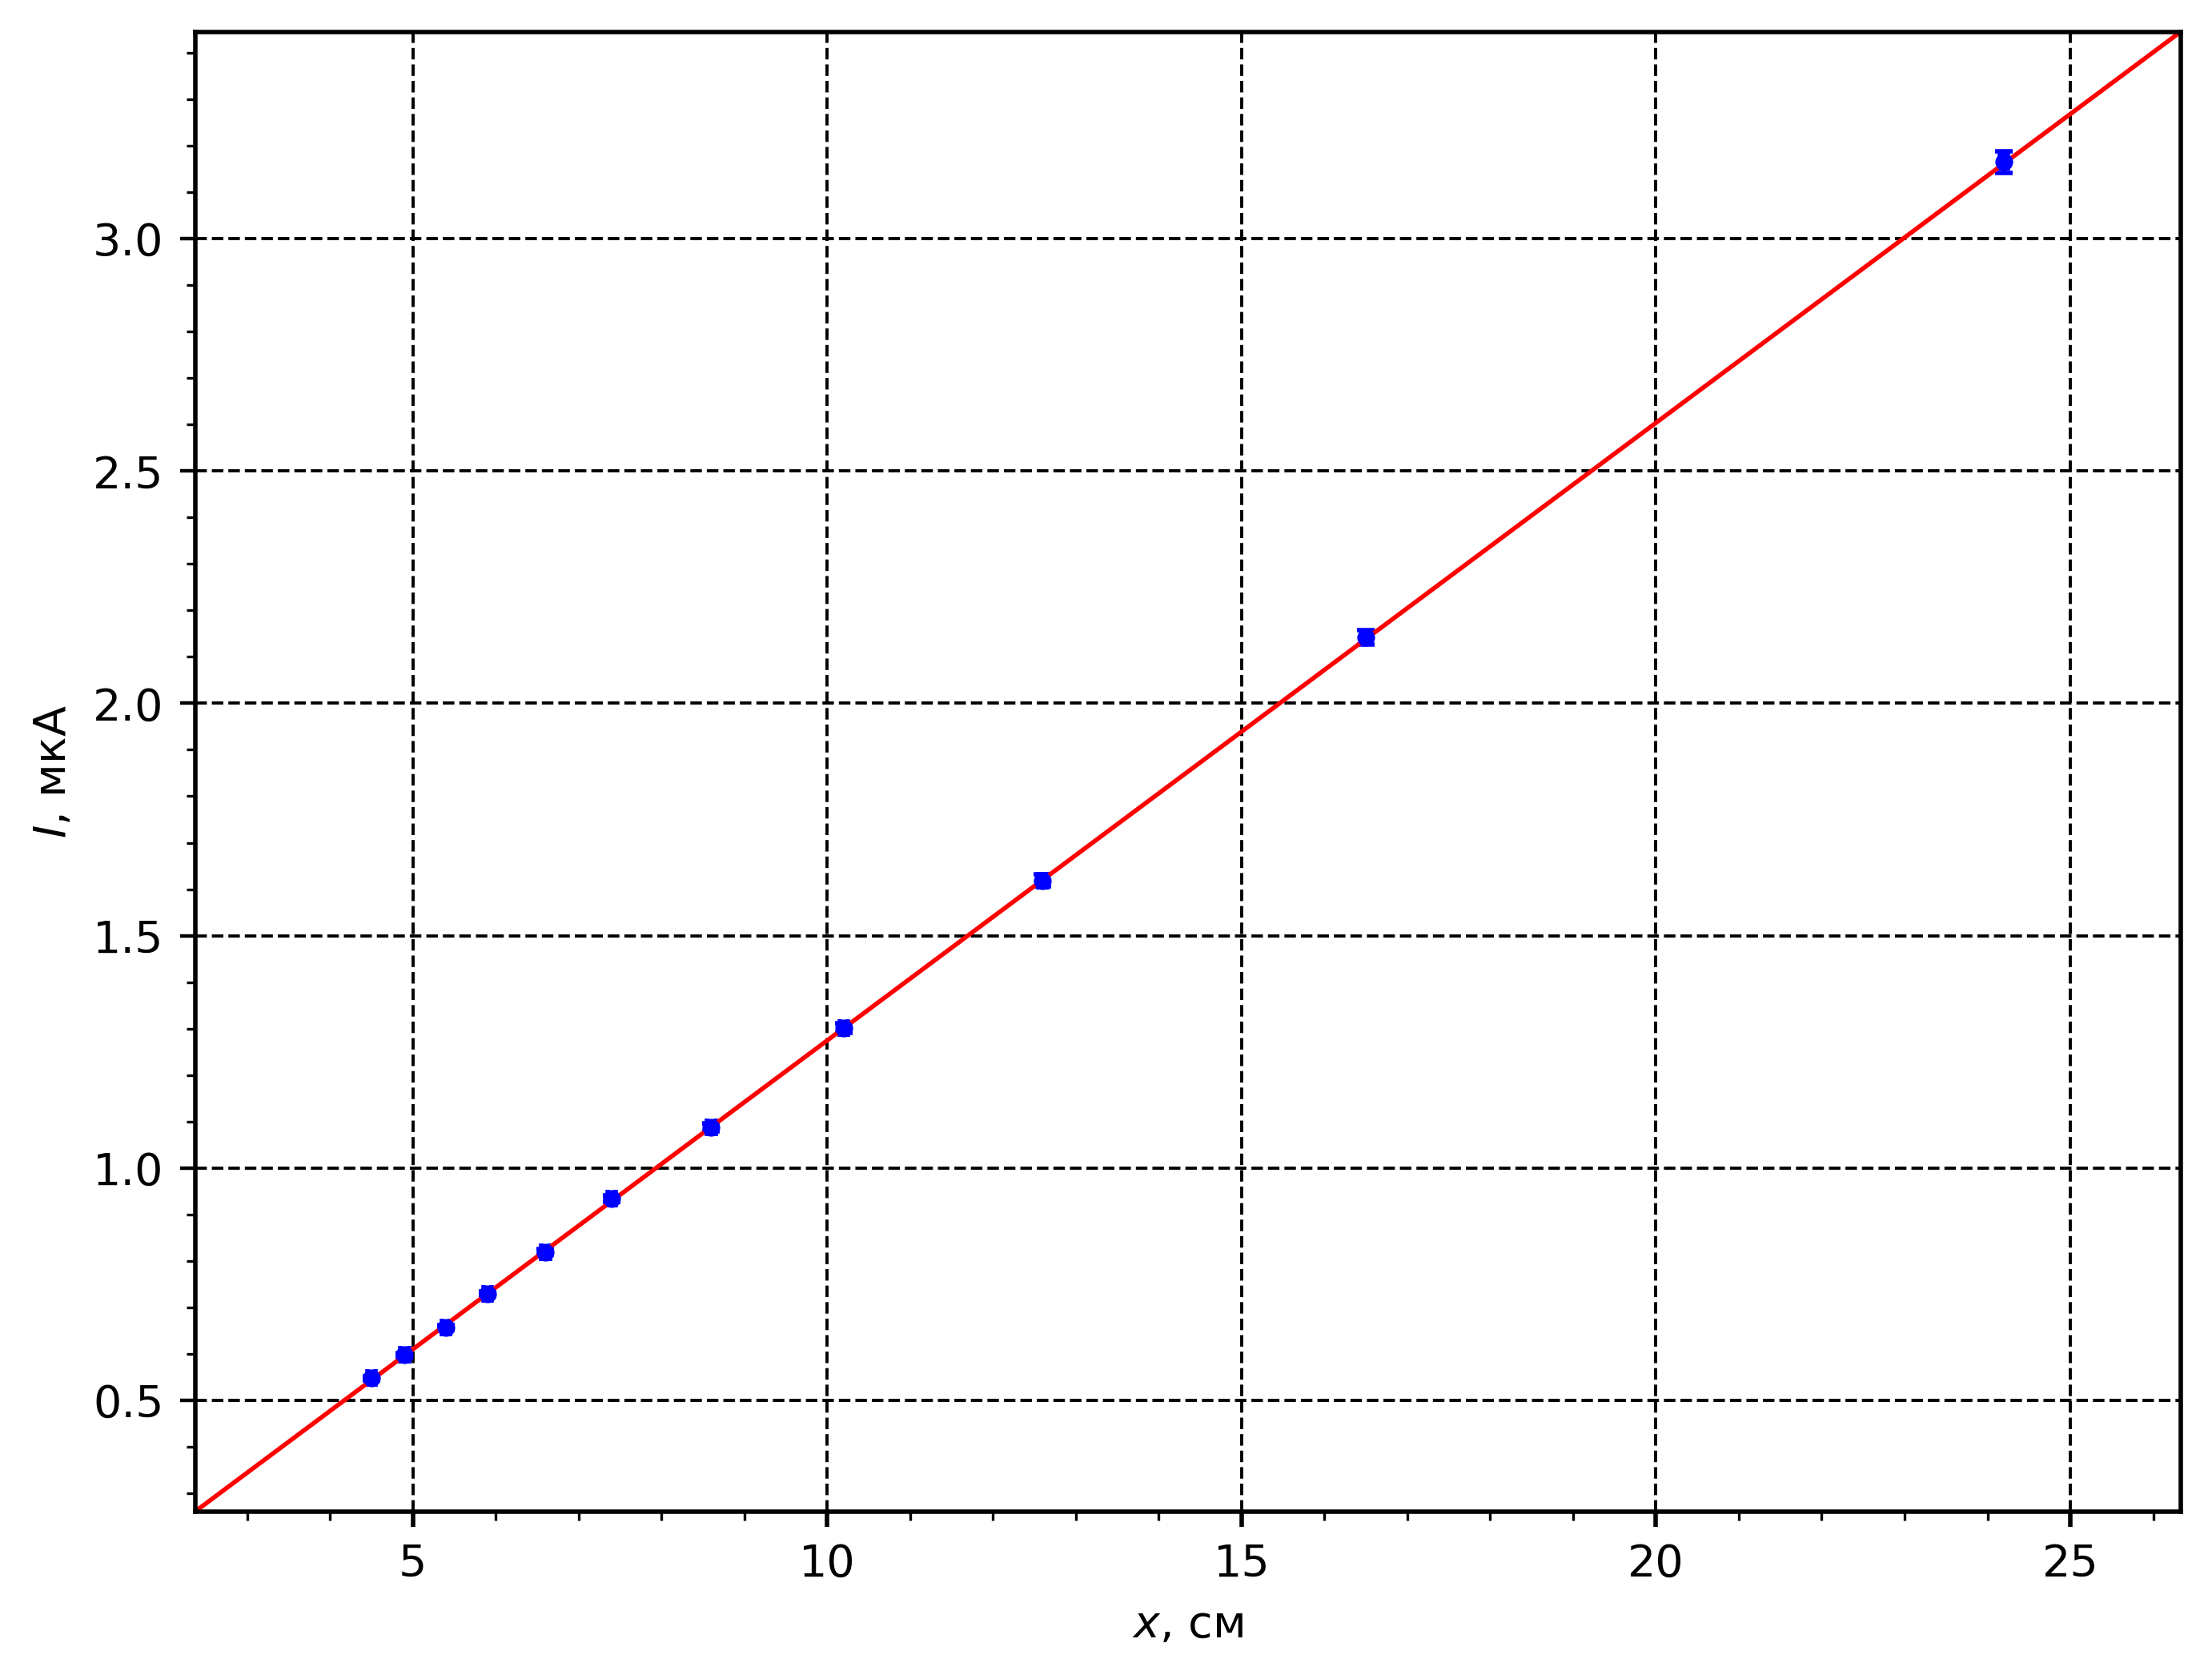

In [108]:
plot7 = lab.plot.Plot(xl="$x$", yl="$I$")
plot7.plot(x7, y7, fmt=".")
plot7.line(k7, b7, color="red")
plot7.save("../img/plot7.png")

In [78]:
C_I = 2 * L * k7
S_I = 1 / C_I
S_I, C_I

(0.0268752908575175+/-0.00021642791401599464 <Unit('1 / microampere')>,
 37.208899628346984+/-0.29964492559681727 <Unit('microampere')>)

In [111]:
utils.totex(S_I)
utils.totex(C_I)

\left(269 \pm 2\right)\cdot 10^{-4}\;\text{мкА}^{-1}
37{,}2 \pm 0{,}3\;\text{мкА}


In [79]:
x1_9 = ufloat(23.5, 0.05) * u("cm")
x2_9 = ufloat(17.8, 0.05) * u("cm")
theta_9 = mmath._log(x1_9/x2_9)
theta_9

0.27780196385207384+/-0.0035238264913807055 <Unit('dimensionless')>

In [112]:
utils.totex(theta_9)

\left(278 \pm 4\right)\cdot 10^{-3}\;


In [80]:
T10_10 = 57.52 * u("s")
T_10  = T10_10 / 10

In [113]:
utils.totex(T_10)

5{,}752000000000001\;\text{с}


In [81]:
task14 = lab.data.Data("../data/task14.csv")
task14["x1"] = task14["x1"] - 0.5 * u("cm")
task14["x2"] = task14["x2"] - 0.5 * u("cm")
task14

,R,x1,x2
0,23700.0 ohm,18.60+/-0.05 centimeter,1.90+/-0.05 centimeter
1,27650.0 ohm,15.80+/-0.05 centimeter,2.00+/-0.05 centimeter
2,31600.0 ohm,13.90+/-0.05 centimeter,2.20+/-0.05 centimeter
3,35550.0 ohm,13.30+/-0.05 centimeter,2.40+/-0.05 centimeter
4,39500.0 ohm,11.00+/-0.05 centimeter,2.40+/-0.05 centimeter
5,43450.0 ohm,10.00+/-0.05 centimeter,2.40+/-0.05 centimeter
6,47400.0 ohm,9.20+/-0.05 centimeter,2.50+/-0.05 centimeter
7,55300.0 ohm,7.90+/-0.05 centimeter,2.60+/-0.05 centimeter
8,63200.0 ohm,6.90+/-0.05 centimeter,2.50+/-0.05 centimeter
9,71100.0 ohm,6.00+/-0.05 centimeter,2.40+/-0.05 centimeter


In [82]:
task14["theta"] = mmath.log(task14["x1"] / task14["x2"])
task14

,R,x1,x2,theta
0,23700.0 ohm,18.60+/-0.05 centimeter,1.90+/-0.05 centimeter,2.281+/-0.026 dimensionless
1,27650.0 ohm,15.80+/-0.05 centimeter,2.00+/-0.05 centimeter,2.067+/-0.025 dimensionless
2,31600.0 ohm,13.90+/-0.05 centimeter,2.20+/-0.05 centimeter,1.843+/-0.023 dimensionless
3,35550.0 ohm,13.30+/-0.05 centimeter,2.40+/-0.05 centimeter,1.712+/-0.021 dimensionless
4,39500.0 ohm,11.00+/-0.05 centimeter,2.40+/-0.05 centimeter,1.522+/-0.021 dimensionless
5,43450.0 ohm,10.00+/-0.05 centimeter,2.40+/-0.05 centimeter,1.427+/-0.021 dimensionless
6,47400.0 ohm,9.20+/-0.05 centimeter,2.50+/-0.05 centimeter,1.303+/-0.021 dimensionless
7,55300.0 ohm,7.90+/-0.05 centimeter,2.60+/-0.05 centimeter,1.111+/-0.020 dimensionless
8,63200.0 ohm,6.90+/-0.05 centimeter,2.50+/-0.05 centimeter,1.015+/-0.021 dimensionless
9,71100.0 ohm,6.00+/-0.05 centimeter,2.40+/-0.05 centimeter,0.916+/-0.022 dimensionless


In [128]:
utils.totex(task14, file="../tex/data14.tex", columns = {
    "x1": "x_1",
    "x2": "x_2",
    "theta": "\\theta",
    "R": "R"
})

In [83]:
x14 = mmath.sqrt(4*const.pi**2 / task14["theta"]**2 + 1)
y14 = task14["R"] + R0
k14, b14 = lf.lsq(x14[:10], y14[:10])
k14, b14

(11540.810517620672+/-195.76373335348703 <Unit('ohm')>,
 -8897.433651788531+/-936.5391548983954 <Unit('ohm')>)

In [116]:
utils.totex(k14)
utils.totex(b14)

11500 \pm 200\;\text{Ом}
-8900 \pm 900\;\text{Ом}


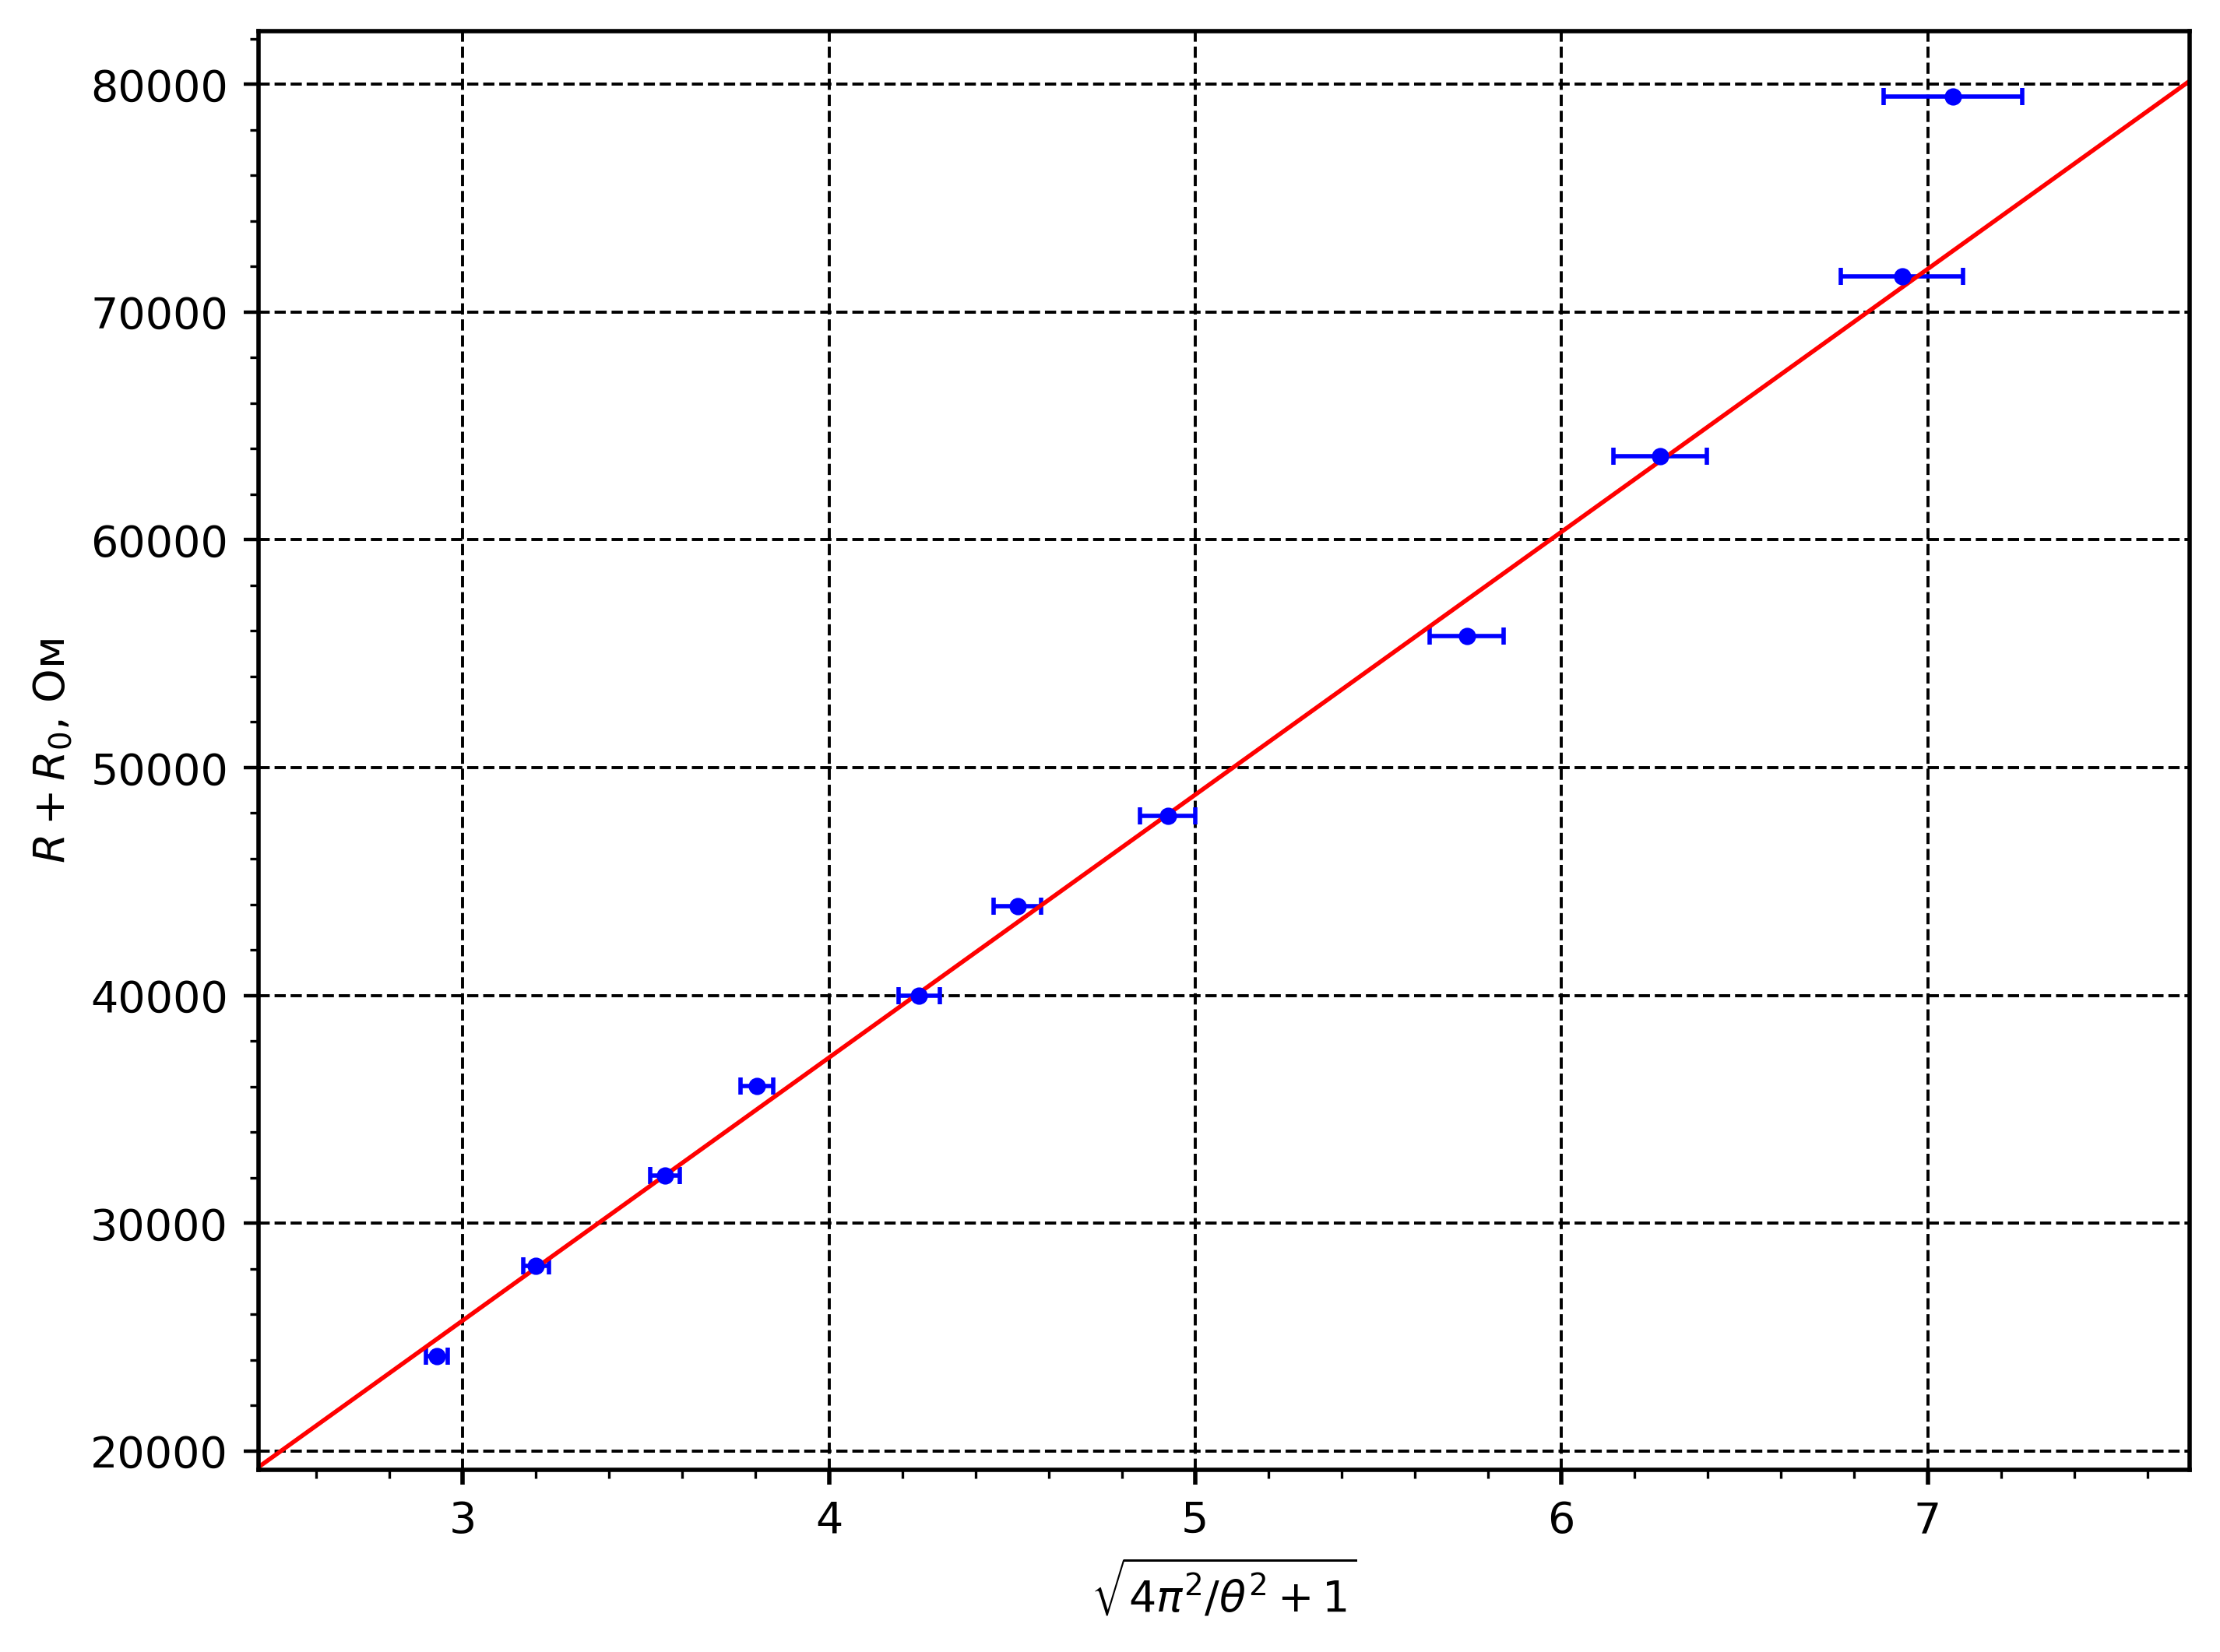

In [117]:
plot14 = lab.plot.Plot(xl="$\\sqrt{4\\pi^2/\\theta^2+1}$", yl="$R+R_0$")
plot14.plot(x14, y14, fmt=".")
plot14.line(k14, b14, color="red")
plot14.save("../img/plot14.png")

In [85]:
R_kr = k14 - R0
R_kr

11065.810517620672+/-195.76373335348703 <Unit('ohm')>

In [120]:
data17 = lab.data.Data("../data/task17.csv")
data17["l"] = data17["l"] - ufloat(0.25, 0.05) * u("cm")
data17

,R,l
0,5.0 kiloohm,7.65+/-0.05 centimeter
1,10.0 kiloohm,11.05+/-0.05 centimeter
2,15.0 kiloohm,13.25+/-0.05 centimeter
3,20.0 kiloohm,14.55+/-0.05 centimeter
4,25.0 kiloohm,15.55+/-0.05 centimeter
5,30.0 kiloohm,16.25+/-0.05 centimeter
6,35.0 kiloohm,17.05+/-0.05 centimeter
7,40.0 kiloohm,17.25+/-0.05 centimeter
8,45.0 kiloohm,18.15+/-0.05 centimeter
9,50.0 kiloohm,18.25+/-0.07 centimeter


In [121]:
utils.totex(data17, file="../tex/data17.tex")

In [122]:
x17 = data17["R"] + R0
x17.ito("ohm")
y17 = data17["l"]
lmax = ufloat(22, 0.05) * u("cm")

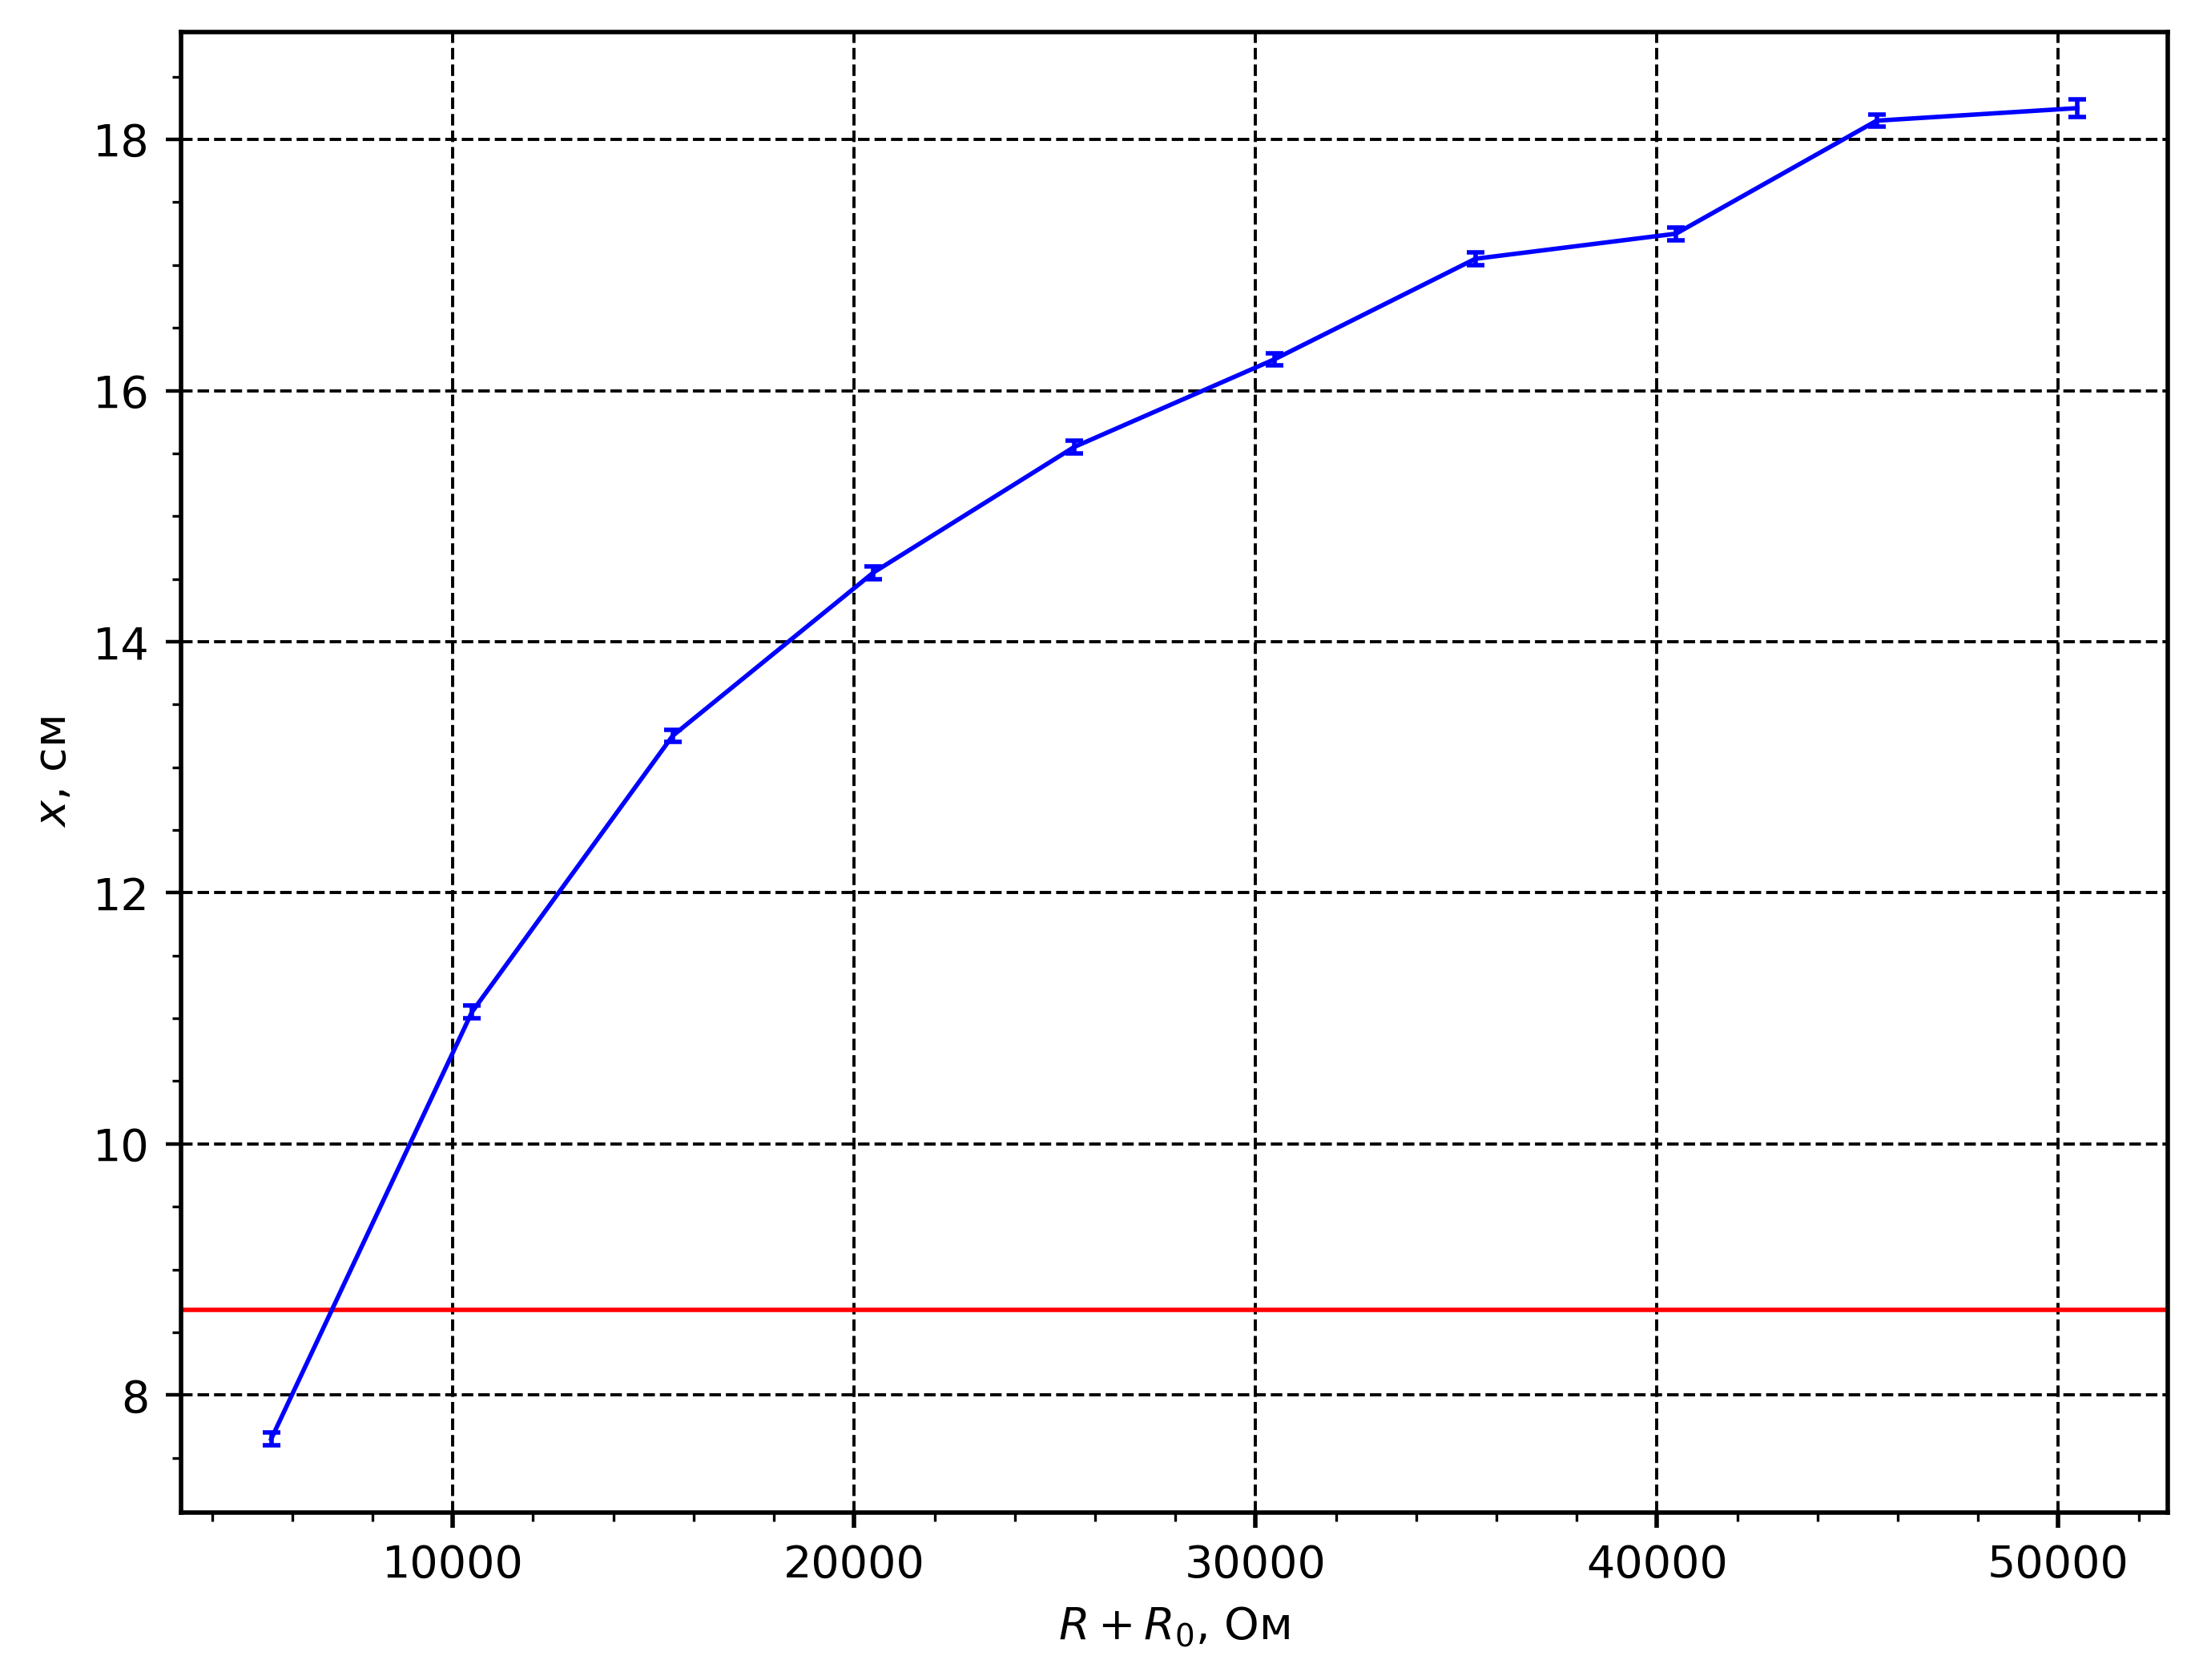

In [123]:
plot17 = lab.plot.Plot(xl="$R+R_0$", yl="$x$")
plot17.plot(x17, y17)
plot17.ax.axhline(lmax.n * math.exp(theta_9.n / 4 - 1), color="red")
plot17.save("../img/plot17.png")

In [129]:
R1R2_25 = 1/40
C = 2 * u("microfarad")
bb = lmax * mmath._exp(theta_9 / 4 - 1)

In [130]:
utils.totex(bb)

8{,}68 \pm 0{,}02\;\text{см}


In [133]:
C25 = 2 * L * R1R2_25 * C * U0 / lmax * mmath._exp(theta_9 / 4 - 1)
C25.ito(u("C"))
C25

1.663743479261678e-05+/-1.7751111776025297e-07 <Unit('coulomb')>

In [134]:
utils.totex(C25)

\left(166 \pm 2\right)\cdot 10^{-7}\;\text{Кл}


In [103]:
tau = R0*C
tau.ito(u("s"))
tau

0.00095 <Unit('second')>

In [126]:
utils.totex(tau)

0{,}00095\;\text{с}


In [106]:
T_10

5.752000000000001 <Unit('second')>